# Graham Algorithm

## Find the base point
Find the point with the lowest y-coordinate.<br>
If there are ties, pick the one with the lowest x-coordinate.<br>
This point will be the pivot to calculate angles.<br>

In [6]:
from generate_dots import ranp, fcsvp, cosp
import numpy as np
import matplotlib.pyplot as plt

points = ranp(n=30, seed=None)
base = min(points, key=lambda p: (p[1], p[0]))
print(f"Base point: {base}")

Base point: (np.float64(0.3084013741368862), np.float64(0.00550902545526466))


## Sort the other points by polar angle
Sort all the other points based on the angle they make with the base point. <br>
If two points have the same angle, keep the farthest one. <br>


Sorted points by polar angle: [(np.float64(0.3084013741368862), np.float64(0.00550902545526466)), (np.float64(0.6032610729464998), np.float64(0.013050544037057299)), (np.float64(0.9598399281794042), np.float64(0.13498792633090118)), (np.float64(0.8289019232628638), np.float64(0.1801091709452597)), (np.float64(0.9234315699872868), np.float64(0.2283032293427254)), (np.float64(0.4444809339939122), np.float64(0.10977876548020693)), (np.float64(0.8061447922770496), np.float64(0.4314224593151432)), (np.float64(0.5415347852592943), np.float64(0.26044230564348225)), (np.float64(0.7964718207278692), np.float64(0.6115425682350738)), (np.float64(0.6934318829820099), np.float64(0.5101753733054095)), (np.float64(0.5896609730714247), np.float64(0.43975852690649186)), (np.float64(0.7186913186571758), np.float64(0.6561249336300363)), (np.float64(0.694513579645164), np.float64(0.6221017207483424)), (np.float64(0.627312546697971), np.float64(0.7510842937705967)), (np.float64(0.4569781347085855), np.floa

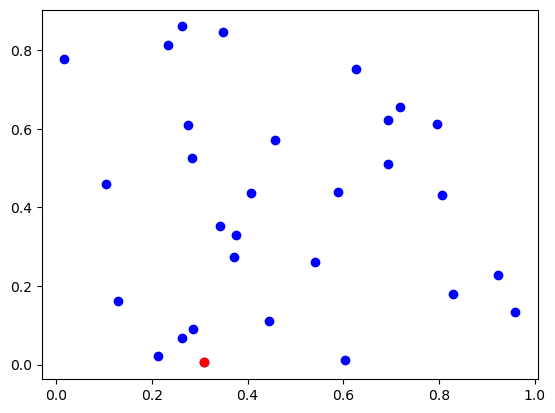

In [7]:
import math

def polar_angle(p):
    return math.atan2(p[1] - base[1], p[0] - base[0])

sorted_pts = sorted(points, key=polar_angle)
plt.scatter(*zip(*sorted_pts), color='blue', label='Sorted Points')
plt.scatter(*base, color='red', label='Base Point') 
print(f"Sorted points by polar angle: {sorted_pts}")


##  Initialize the stack
Push the first three sorted points into a stack. <br>
These will be the initial part of the convex hull. <br>

In [8]:
stack = sorted_pts[:3]
print(f"Initial stack: {stack}")

Initial stack: [(np.float64(0.3084013741368862), np.float64(0.00550902545526466)), (np.float64(0.6032610729464998), np.float64(0.013050544037057299)), (np.float64(0.9598399281794042), np.float64(0.13498792633090118))]


## Process the rest

For each point in the sorted list:

1. Check if the last three points in the stack make a left turn.
2. If not, pop the second-to-last point from the stack.
3. Repeat until a left turn is formed.
4. Then push the current point onto the stack.

Use the cross product to check turn direction:

Final convex hull stack: [(np.float64(0.3084013741368862), np.float64(0.00550902545526466)), (np.float64(0.6032610729464998), np.float64(0.013050544037057299)), (np.float64(0.9598399281794042), np.float64(0.13498792633090118)), (np.float64(0.7964718207278692), np.float64(0.6115425682350738)), (np.float64(0.627312546697971), np.float64(0.7510842937705967)), (np.float64(0.34927730989148775), np.float64(0.8453324817086108)), (np.float64(0.2625630822418923), np.float64(0.860233757227474)), (np.float64(0.01676266301429208), np.float64(0.7773273434161747)), (np.float64(0.12785792073863245), np.float64(0.16181526335430296)), (np.float64(0.2133583754523013), np.float64(0.022613485123419097))]


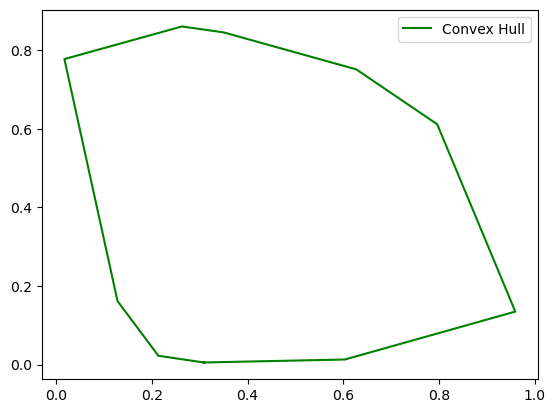

In [9]:
def cross(o, a, b):
    return (a[0] - o[0]) * (b[1] - o[1]) - \
           (a[1] - o[1]) * (b[0] - o[0])

for p in sorted_pts[3:]:
    while len(stack) >= 2 and cross(stack[-2], stack[-1], p) <= 0:
        stack.pop()
    stack.append(p)

plt.plot(*zip(*stack, stack[0]), color='green', label='Convex Hull')
plt.legend()    
print(f"Final convex hull stack: {stack}")

If cross(...) > 0: left turn <br>
If cross(...) < 0: right turn, pop <br>
If cross(...) == 0: collinear <br>

## The stack is your convex hull

Once you’ve gone through all points, the stack contains the vertices of the convex hull in order.

C:\Users\astro\AppData\Local\Temp\ipykernel_21904\934475606.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(hx, hy, 'r--', lw=2, label='Convex Hull', color='green')


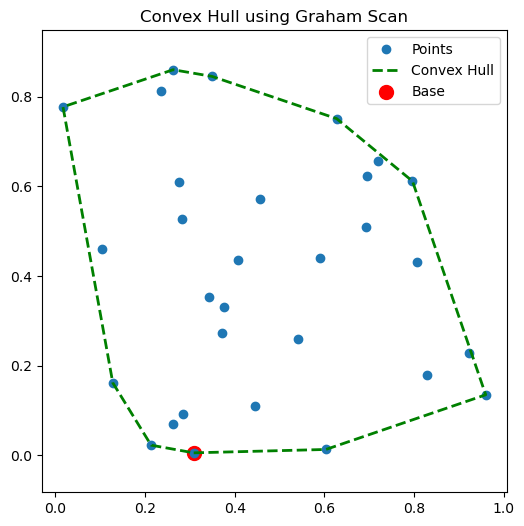

In [15]:
x, y = zip(*points)
hx, hy = zip(*(stack + [stack[0]]))

plt.figure(figsize=(6, 6))
plt.plot(x, y, 'o', label='Points')
plt.plot(hx, hy, 'r--', lw=2, label='Convex Hull', color='green') 
plt.scatter(*base, color='red', s=100, label='Base')
plt.title('Convex Hull using Graham Scan')
plt.legend()
#plt.grid(True)
plt.axis('equal')
plt.show()